In [24]:
!pip install catboost

In [25]:
!pip install pycaret

In [26]:
import pandas as pd
from pycaret.classification import *
from tqdm import tqdm

# 데이콘 점수

In [27]:
# 제출 점수(제출 날짜) : 0.6819746288(2021-12-27 12:40:05)

# 설정

In [28]:
# pycaret : cat
# probability_threshold=0.3916
# tune : ❌(자체 점수 떨어짐.)
# combine, minmaxscaler
# 순서형 특성 수치형으로 지정(4개) : ⭕
    # 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'
# 카테고리 특성 지정(9개) : ❌
  # 'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3', 'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3', 'contents_attribute_l', 'contents_attribute_d', 'contents_attribute_h'

In [29]:
# 'id', 'contents_open_dt' 제거 : ⭕
# 모든 값이 1인 'person_prefer_f', 'person_prefer_g' 열 제거 : ⭕
# contents_rn 제거 : ⭕
# 중복 샘플 제거 : ❌

In [30]:
# 차이가 비교적 많이 나는 특성(25개)만 훈련/예측 : ❌

# d_l_match_yn
# d_m_match_yn
# d_s_match_yn

# h_l_match_yn

# person_attribute_a
# person_attribute_a_1
# person_attribute_b
# person_prefer_c

# person_prefer_d_1
# person_prefer_d_2
# person_prefer_d_3

# person_prefer_e

# person_prefer_h_1
# person_prefer_h_2
# person_prefer_h_3
##############################
# contents_attribute_i
# contents_attribute_a

# contents_attribute_j
# contents_attribute_j_1
# contents_attribute_c

# contents_attribute_l
# contents_attribute_d

# contents_attribute_m
# contents_attribute_e

# contents_attribute_h

# 데이터 불러오기

In [49]:
# train = pd.read_csv('../data/train.csv')
# test = pd.read_csv('../data/test.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 데이터 확인

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [51]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

In [53]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


# 필요 데이터 추출

In [54]:
# person_rn :  사용자번호
# contents_rn :  컨텐츠번호
# contents_open_dt :  컨텐츠 열람 일시

## 훈련에 의미가 적은 열 제거

In [55]:
train = train.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g', 'contents_rn'], axis=1) 
test = test.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g', 'contents_rn'], axis=1)

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   d_l_match_yn            501951 non-null  bool 
 1   d_m_match_yn            501951 non-null  bool 
 2   d_s_match_yn            501951 non-null  bool 
 3   h_l_match_yn            501951 non-null  bool 
 4   h_m_match_yn            501951 non-null  bool 
 5   h_s_match_yn            501951 non-null  bool 
 6   person_attribute_a      501951 non-null  int64
 7   person_attribute_a_1    501951 non-null  int64
 8   person_attribute_b      501951 non-null  int64
 9   person_prefer_c         501951 non-null  int64
 10  person_prefer_d_1       501951 non-null  int64
 11  person_prefer_d_2       501951 non-null  int64
 12  person_prefer_d_3       501951 non-null  int64
 13  person_prefer_e         501951 non-null  int64
 14  person_prefer_h_1       501951 non-null  int64
 15  

In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   d_l_match_yn            46404 non-null  bool 
 1   d_m_match_yn            46404 non-null  bool 
 2   d_s_match_yn            46404 non-null  bool 
 3   h_l_match_yn            46404 non-null  bool 
 4   h_m_match_yn            46404 non-null  bool 
 5   h_s_match_yn            46404 non-null  bool 
 6   person_attribute_a      46404 non-null  int64
 7   person_attribute_a_1    46404 non-null  int64
 8   person_attribute_b      46404 non-null  int64
 9   person_prefer_c         46404 non-null  int64
 10  person_prefer_d_1       46404 non-null  int64
 11  person_prefer_d_2       46404 non-null  int64
 12  person_prefer_d_3       46404 non-null  int64
 13  person_prefer_e         46404 non-null  int64
 14  person_prefer_h_1       46404 non-null  int64
 15  person_prefer_h_2  

## 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경

In [58]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
train = train.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,target
0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,1
1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,0
2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,0
3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,0
4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,0


In [59]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
test = test.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
test.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn
0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790
1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058
2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061
3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813
4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146


In [60]:
# 순서형 특성 수치형으로 지정(4개) : ⭕
    # 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

# 모델 훈련/예측

In [61]:
ex = setup(train, target='target', n_jobs=-1, use_gpu=True,
           session_id=0, verbose=True, silent=True, 
           fold=5, fold_shuffle=True, combine_rare_levels=True, 
           numeric_features=['person_attribute_a_a', 'person_attribute_b',
                             'person_prefer_e', 'contents_attribute_e']
           )

,Description,Value
0,session_id,0
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(501951, 30)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,15
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models(sort='F1')
# 36m

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6138,0.6607,0.6693,0.6022,0.6340,0.2277,0.2291,13.474
catboost,CatBoost Classifier,0.6123,0.6583,0.6607,0.6021,0.6300,0.2247,0.2258,18.434
rf,Random Forest Classifier,0.6133,0.6595,0.6219,0.6110,0.6164,0.2266,0.2266,88.268
gbc,Gradient Boosting Classifier,0.6008,0.6428,0.6395,0.5933,0.6155,0.2017,0.2023,92.840
ada,Ada Boost Classifier,0.5932,0.6324,0.6184,0.5884,0.6030,0.1864,0.1866,21.338
ridge,Ridge Classifier,0.5869,0.0000,0.6027,0.5839,0.5931,0.1737,0.1738,0.596
lda,Linear Discriminant Analysis,0.5868,0.6207,0.6027,0.5838,0.5931,0.1737,0.1738,3.922
et,Extra Trees Classifier,0.5950,0.6336,0.5897,0.5956,0.5926,0.1899,0.1899,92.522
dt,Decision Tree Classifier,0.5491,0.5491,0.5497,0.5487,0.5492,0.0982,0.0982,7.240
knn,K Neighbors Classifier,0.5424,0.5560,0.5566,0.5409,0.5486,0.0848,0.0849,16.658


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [62]:
# 모델 생성
model = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6121,0.6577,0.6616,0.6017,0.6303,0.2243,0.2254
1,0.6091,0.6559,0.6566,0.5994,0.6267,0.2183,0.2193
2,0.6147,0.6614,0.6603,0.6048,0.6313,0.2294,0.2304
3,0.6148,0.6599,0.6632,0.6044,0.6324,0.2297,0.2308
4,0.6106,0.6565,0.6624,0.6000,0.6296,0.2214,0.2226
Mean,0.6123,0.6583,0.6608,0.6021,0.6301,0.2246,0.2257
SD,0.0022,0.0021,0.0023,0.0022,0.0019,0.0045,0.0044


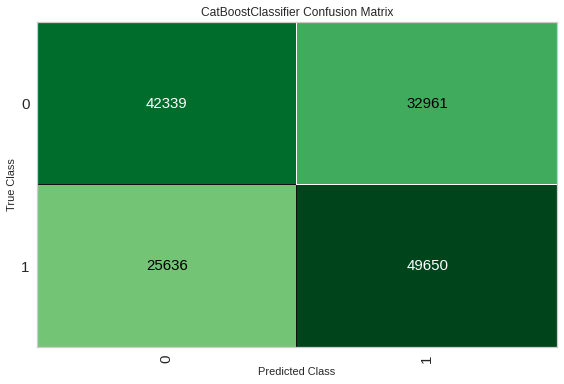

In [63]:
plot_model(model, plot='confusion_matrix')

In [64]:
# optimize threshold for trained model
optimize_threshold(model, false_negative = -1500, false_positive=-500)

Optimized Probability Threshold: 0.2873 | Optimized Cost Function: -36041500


0.2873

# train자체 검증 점수

In [65]:
# 예측
train_pred = predict_model(model, train, probability_threshold=0.3916)

In [66]:
from pycaret.utils import check_metric
check_metric(train['target'], train_pred['Label'], metric = 'F1')

0.6869

## test 예측

In [ ]:
# 예측
pred = predict_model(model, test, probability_threshold=0.3916)

In [ ]:
pred.iloc[:,-2:].head(20)

,Label,Score
0,1,0.4903
1,0,0.6117
2,1,0.3997
3,1,0.5486
4,1,0.4587
5,0,0.7516
6,1,0.5290
7,0,0.7940
8,1,0.4452
9,0,0.6130


In [ ]:
pred['Label']

0        1
1        0
2        1
3        1
4        1
        ..
46399    1
46400    1
46401    1
46402    1
46403    1
Name: Label, Length: 46404, dtype: int64

In [ ]:
pred['Label'].value_counts()

1    37538
0     8866
Name: Label, dtype: int64

# 제출파일 불러오기

In [ ]:
# sub = pd.read_csv('../data/sample_submission.csv')
sub = pd.read_csv('sample_submission.csv')
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      46404 non-null  int64
 1   target  46404 non-null  int64
dtypes: int64(2)
memory usage: 725.2 KB


In [ ]:
sub.head()

,id,target
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1


# 제출파일 생성

In [ ]:
sub['target'] = pred['Label']
sub.to_csv('sub_ver2.3.csv', index=False)

In [ ]:
sub.head(10)

,id,target
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1
5,5,0
6,6,1
7,7,0
8,8,1
9,9,0


# 코드 마지막